In [1]:
import pandas as pd
from statistics import mean 

In [2]:
individual = pd.read_csv('./data/processed_individual_cases_Sep20th2020.csv', parse_dates=True)
loc = pd.read_csv('./data/processed_location_Sep20th2020.csv', parse_dates=True)

In [3]:
list(individual.columns)

['age',
 'sex',
 'province',
 'country',
 'latitude',
 'longitude',
 'date_confirmation',
 'additional_information',
 'source',
 'outcome']

In [4]:
list(loc.columns)

['Province_State',
 'Country_Region',
 'Last_Update',
 'Lat',
 'Long_',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'Combined_Key',
 'Incidence_Rate',
 'Case-Fatality_Ratio']

## Values missing for the individual cases

In [5]:
for col in individual.columns:
    print(f'Column {col} has {individual[col].isna().sum()} missing values')

Column age has 296874 missing values
Column sex has 293734 missing values
Column province has 6568 missing values
Column country has 24 missing values
Column latitude has 2 missing values
Column longitude has 2 missing values
Column date_confirmation has 462 missing values
Column additional_information has 522969 missing values
Column source has 209191 missing values
Column outcome has 0 missing values


## Values missing from the location cases

In [6]:
for col in loc.columns:
    print(f'Column {col} has {loc[col].isna().sum()} values')

Column Province_State has 168 values
Column Country_Region has 0 values
Column Last_Update has 0 values
Column Lat has 80 values
Column Long_ has 80 values
Column Confirmed has 0 values
Column Deaths has 0 values
Column Recovered has 0 values
Column Active has 2 values
Column Combined_Key has 0 values
Column Incidence_Rate has 80 values
Column Case-Fatality_Ratio has 48 values


## Converting the age to a reasonable value
For range ages we used the mean of the upper and lower bound to represent the age of the patient and for ages that we had an age and above, we use the base age for representing the patients age

In [7]:
def try_convert(x):
    try:
        pd.to_numeric(x)
    except:
        if '-' in x:
            try:
                return mean([int(i) for i in x.split('-')])
            except:
                return int(x.split('-')[0])
        elif '+' in x:
            return int(x.split('+')[0])
        else:
            return int(x.split()[0])/12.

In [8]:
individual['age'] = individual['age'].apply(try_convert,)

### Patients Ages

<AxesSubplot:ylabel='Frequency'>

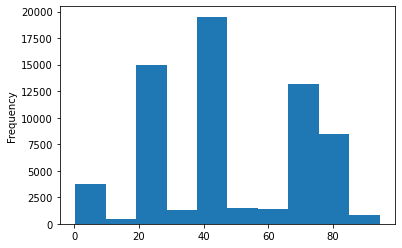

In [16]:
individual[individual['age'].notna()]['age'].plot(kind='hist')

## Date conversion 

In [10]:
# Range dates
d_1 = pd.to_datetime(individual[(individual['date_confirmation'].str.contains('-')) & (individual['date_confirmation'].notna())]['date_confirmation'].str.split('-', expand=True)[0])
d_2 = pd.to_datetime(individual[(individual['date_confirmation'].str.contains('-')) & (individual['date_confirmation'].notna())]['date_confirmation'].str.split('-', expand=True)[1])
# Dates that the conversion is inconsistant with the actual date
d_1[d_2.dt.month - d_1.dt.month<0]

18747    2020-10-03
42927    2020-10-03
100214   2020-10-03
116279   2020-12-03
170613   2020-10-03
171967   2020-10-03
195883   2020-12-03
206155   2020-10-03
210762   2020-12-03
221985   2020-10-03
241475   2020-10-03
257565   2020-10-03
262669   2020-07-03
269995   2020-12-03
279467   2020-10-03
303270   2020-10-03
313904   2020-10-03
353920   2020-12-03
358513   2020-10-03
371061   2020-10-03
376960   2020-12-03
391248   2020-10-03
398512   2020-10-03
408347   2020-10-03
429885   2020-06-03
453014   2020-10-03
461654   2020-10-03
471331   2020-12-03
490766   2020-10-03
494172   2020-12-03
498182   2020-10-03
518141   2020-10-03
Name: 0, dtype: datetime64[ns]

In [11]:
individual['date_confirmation'] = pd.to_datetime(individual[~individual['date_confirmation'].str.contains('-',na=False)]['date_confirmation'])
individual

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Gujarat,India,23.02776,72.60027,2020-04-15,NaN,https://gujcovid19.gujarat.gov.in/uploads/pres...,hospitalized
1,NaN,male,Moyobamba,Peru,-6.03271,-76.97230,2020-09-05,NaN,NaN,nonhospitalized
2,NaN,female,Lima,Peru,-12.04318,-77.02824,2020-04-15,NaN,NaN,nonhospitalized
3,NaN,NaN,Gujarat,India,23.02776,72.60027,2020-05-22,NaN,https://www.deshgujarat.com/2020/05/22/gujarat...,hospitalized
4,NaN,female,Coronel Portillo,Peru,-8.40921,-74.55572,2020-04-30,NaN,NaN,nonhospitalized
...,...,...,...,...,...,...,...,...,...,...
557359,NaN,male,Callao,Peru,-12.04175,-77.09082,2020-04-15,NaN,NaN,nonhospitalized
557360,NaN,NaN,Maharashtra,India,18.94017,72.83483,2020-05-29,NaN,https://arogya.maharashtra.gov.in/pdf/ncovidep...,recovered
557361,NaN,NaN,Maharashtra,India,19.03681,73.01582,2020-05-19,NaN,NaN,recovered
557362,NaN,female,Tamil Nadu,India,13.08362,80.28252,2020-05-31,NaN,https://stopcorona.tn.gov.in/wp-content/upload...,hospitalized


## BAD DATE CONVERSION, DAYS AND MONTHS ARE SWAPPED

In [12]:
individual[individual['date_confirmation']>pd.to_datetime('2020-09-20')]

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
9,NaN,NaN,West Bengal,India,23.797760,87.986406,2020-11-04,"As per MohFW update,",https://www.mohfw.gov.in/,hospitalized
24,NaN,NaN,Punjab,India,29.990840,75.399970,2020-11-05,NaN,http://pbhealth.gov.in/Media%20Bulletin%20COVI...,hospitalized
31,NaN,NaN,Maharashtra,India,18.940170,72.834830,2020-10-05,NaN,https://arogya.maharashtra.gov.in/pdf/ncovidep...,recovered
54,NaN,NaN,Gujarat,India,22.309460,73.179930,2020-12-05,NaN,https://twitter.com/PIBAhmedabad/status/126021...,recovered
75,NaN,NaN,el oro,Ecuador,-3.258111,-79.955392,2020-11-04,NaN,NaN,nonhospitalized
...,...,...,...,...,...,...,...,...,...,...
557317,NaN,NaN,Maharashtra,India,18.940170,72.834830,2020-10-05,NaN,https://t.me/indiacovid/4483,hospitalized
557323,NaN,female,Tamil Nadu,India,13.083620,80.282520,2020-12-05,NaN,https://stopcorona.tn.gov.in/wp-content/upload...,hospitalized
557327,NaN,NaN,West Bengal,India,24.176090,88.272960,2020-11-05,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,hospitalized
557344,NaN,NaN,Maharashtra,India,18.940170,72.834830,2020-10-05,NaN,https://t.me/indiacovid/4483,hospitalized


## US cases

<AxesSubplot:title={'center':'Confirmed cases across US'}, xlabel='States', ylabel='Log of # of cases'>

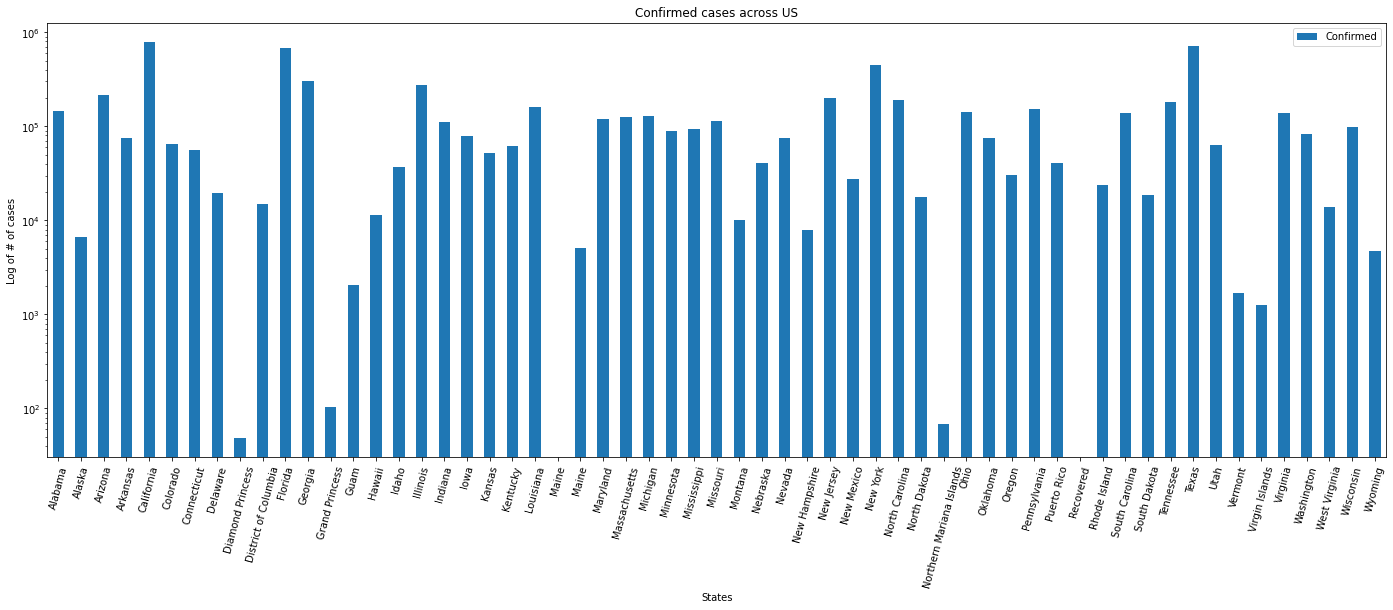

In [13]:
total_cases = loc[loc['Country_Region'] == 'US'].groupby(['Province_State', 'Last_Update']).agg({'Confirmed':'sum'}).reset_index()
total_cases[['Province_State', 'Confirmed']].plot(x='Province_State',kind='bar',figsize=(24,8),logy=True,xlabel='States', ylabel='Log of # of cases', title='Confirmed cases across US', rot=75)

In [14]:
individual[individual['country'] == 'United States']

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
20,34.5,female,Vermont,United States,44.461123,-73.081581,2020-03-16,Self-isolating at home,https://www.healthvermont.gov/media/newsroom/v...,nonhospitalized
89,NaN,female,Florida,United States,29.057307,-81.184136,2020-07-03,in isolation; recent travel history,http://www.floridahealth.gov/diseases-and-cond...,nonhospitalized
151,NaN,NaN,Mississippi,United States,30.768985,-89.589712,2020-03-19,NaN,"https://msdh.ms.gov/msdhsite/_static/14,0,420....",nonhospitalized
260,84.5,male,Washington,United States,47.491332,-121.803640,2020-06-03,Resident of Ida Culver House,https://www.kiro7.com/news/local/coronavirus-w...,deceased
294,NaN,male,Florida,United States,27.928952,-82.721790,2020-03-26,NaN,https://floridahealthcovid19.gov/,nonhospitalized
...,...,...,...,...,...,...,...,...,...,...
557190,0.5,NaN,Florida,United States,26.152188,-80.487715,2020-03-24,NaN,https://floridahealthcovid19.gov/,nonhospitalized
557195,NaN,NaN,Virginia,United States,37.325836,-76.782770,2020-12-03,NaN,http://www.vdh.virginia.gov/surveillance-and-i...,nonhospitalized
557235,NaN,female,Florida,United States,26.152188,-80.487715,2020-03-18,NaN,http://floridadisaster.org/globalassets/covid-19,nonhospitalized
557314,NaN,male,Florida,United States,26.152188,-80.487715,2020-03-15,NaN,NaN,nonhospitalized
